In [ ]:
# %pip install "gymnasium[toy-text]" Pillow

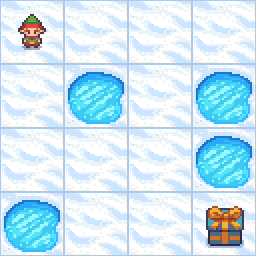

In [ ]:
import gymnasium as gym
from PIL import Image
import random

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)
env.reset()

Image.fromarray(env.render())

In [2]:
from itertools import product
import random

from gymnasium.spaces.tuple import Tuple

def space_to_tuples(space):
    if isinstance(space, Tuple):
        for encoding in product(*[range(factor.n) for factor in space]):
            yield encoding
    else:
        for encoding in range(space.n):
            yield encoding

def get_best_action(q_table, state): # for a given state, find the best action from the Q table
    return max(((action, value) for action, value in q_table[state].items()), key=lambda x: x[1])[0]

In [4]:
alpha = 0.1
gamma = 0.9
n_episodes = 100_000
max_steps = 100
epsilon = 0.2

q_table = {i: {j: 0 for j in space_to_tuples(env.action_space)} for i in space_to_tuples(env.observation_space)}

In [5]:
for _ in range(n_episodes):
    # new episode (game), so we need a reset
    state, _ = env.reset()

    # play the game for max_steps
    for step in range(max_steps):
        # pick an action
        if random.random() < epsilon:
            # sometimes it is random to encourage exploration, otherwise we cannot find good policies ...
            action = env.action_space.sample()
        else:
            # ... and sometimes we use the best action according to our Q-table
            action = get_best_action(q_table, state)

        # we take that action and then get some data from the game
        next_state, reward, terminated, _, _ = env.step(action)

        # update the Q-table according to the magic formula
        q_table[state][action] = (1-alpha)*q_table[state][action] + alpha*(reward + gamma*max(q_table[next_state].values()))

        # check if the game is finished, can be if you win or lose
        if terminated:
            # a new episode starts after this
            break
        else:
            # if the episode continues, update the current state (we took an action!)
            state = next_state

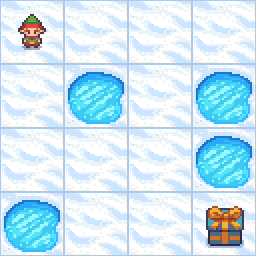

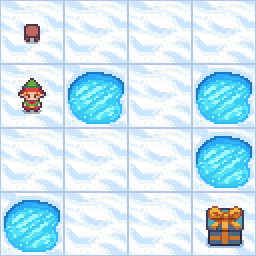

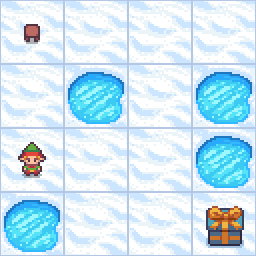

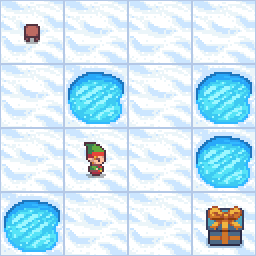

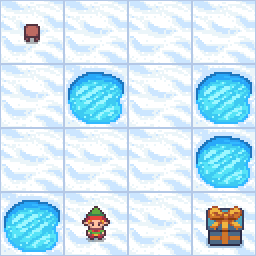

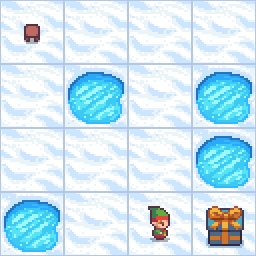

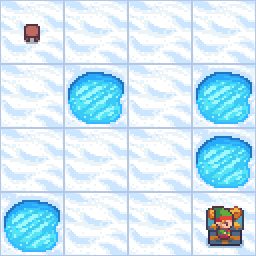

In [6]:
def render_func(env):
    img = Image.fromarray(env.render())
    display(img)

state, _ = env.reset()

while True:
    render_func(env) # draw a picture
    action = get_best_action(q_table, state) # best action according to our table
    next_state, _, terminated, _, _ = env.step(action)

    if terminated:
        break
    else:
        state = next_state

render_func(env)